# ENTREGA DEL MINIPROYECTO #1

**Desarrollado por**:

Johan Díaz

Miguel Lugo

Luis David Peñaranda

Hector Sanjuan


## Índice

    1. Análisis Exploratorio de Datos (EDA)

        1.1. Carga de los datos 

        1.2 Primer vistazo a los datos

        1.3. Análisis de los datos

        1.4. Resumen de las variables númericas

        1.5 Distribución de la variable objetivo

        1.6 Análisis de las categóricas vs el target

        1.7 Visualización de las variables numéricas

            1.7.1 Histogramas
        
            1.7.2 Boxplot y detección de outliers

        1.8 Matriz de correlación

    2. Modelos K-nn

        2.1 Modelo de clasificación binaria
            
            2.1.1 Búsqueda del mejor K

            2.1.2 Entrenamiento del modelo con el mejor K, matriz de confusión y métricas precision, recall y f1-score

            2.1.3 Curva ROC y AUC

        2.2 Modelo de regresión

            2.2.1 Búsqueda del mejor K

            2.2.2 Entrenamiento del modelo con el mejor k

            2.2.3 Gráfico predicho vs real

    3. Conclusiones
        

## 1. Análisis Exploratorio de Datos (EDA)

### 1.1 Carga de los datos

Primero que todo, cargamos la base de datos almacenada en un archivo `.csv` para poder trabajar con ella.

In [92]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import warnings
import IPython.display as display
from scipy.stats.mstats import winsorize
import math
warnings.filterwarnings("ignore")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6)})

url="https://raw.githubusercontent.com/hector3910/minproyect_1/refs/heads/main/data/data.csv"
# Cargar el archivo CSV
df = pd.read_csv(url, sep=";")  


### 1.2 Primer vistazo a los datos

Para poder realizar un buen modelo tenemos que ver antes el comportamiento de los datos y realizar cambios a los mismos de ser necesarios.

In [93]:
# Mostrar forma del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Mostrar primeras filas
df.head()


El dataset tiene 4424 filas y 37 columnas.


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### 1.3. Análisis de los datos

Revisamos las características de la base de datos, y si hay datos faltantes en la base aplicamos una imputación.

In [94]:
print("Resumen técnico del DataFrame:")
df.info()

Resumen técnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's q

La función `.info()` nos revela lo siguiente:
- **El tamaño de la base de datos:** Este conjunto de datos tiene 4424 entradas, así como 37 columnas, incluyendo el target.

- **Los tipos de datos encontrados**: Si bien a simple vista podemos apreciar que algunos nombres de las variables nos indican que estas deberían ser categóricas, en esta base de datos se encuentran registradas por una codificación numérica, por lo que aparecen como tipo `int64`. Otros tipos encontrados son el `float64` para variables como `Curricular units 1st sem (grade)`, el cual se refiere a la nota conseguida por los alumnos. Por último, está el tipo `object` para la variable target, la cual si está registrada por sus categorías y no por una codificación.

- **El número de valores no nulos por variable**: Dado que, en cada variable, el número de valores no nulos es el mismo que el de instancias de la base de datos, concluimos que no existen datos faltantes, por lo que podemos seguir con el análisis sin necesidad de una imputación.

Dado que las variables categóricas están codificadas numéricamente, vamos a diferenciarlas de las númericas:

In [95]:

#Limpiamos los nombres de las columnas
df.columns = df.columns.str.strip()

#Variables categóricas codificadas numéricamente
categorical_columns = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

#Seleccionar variables numéricas reales
numerical_columns = [col for col in df.columns 
                     if df[col].dtype in ['int64', 'float64'] 
                     and col not in categorical_columns 
                     and col != 'Target']


### 1.4 Resumen de las variables numéricas

Realizamos un resumen numérico de la base de datos con la función `describe()`.

In [96]:
# Medidas estadísticas para variables numéricas reales
medidas = df[numerical_columns].describe().T

display.display(medidas)


,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (credited),4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular units 1st sem (enrolled),4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular units 1st sem (evaluations),4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular units 1st sem (without evaluations),4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
Curricular units 2nd sem (credited),4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000


A simple vista, y como posteriormente veremos en los boxplot, podemos ver algunas cosas interesantes.

- En las variables que hacen referencia a las asignaturas homologadas por el estudiante, es decir: `Curricular units 1st sem (credited)` y `Curricular units 2nd sem (credited)`, el 75% de los datos está registrado como 0, pero el registro mas alto es 20 y 19 respectivamente. Esto tiene sentido, ya que no todos los estudiantes tienen la oportunidad de homologar materias, por lo que la gran mayoría tiene un valor de 0 en ese registro. Esto ademas nos da un indicio de que existen valores atípicos en estas variables.

- El comportamiento recién mencionado se puede apreciar también en las variables que hacen referencia a las asignaturas en las que los estudiantes no fueron evaluados (`Curricular units 1st sem (without evaluations)` y `Curricular units 2nd sem (without evaluations)`). Esto nos indica que no es tan grande la cantidad de alumnos que no presentaron exámenes (por abandonar la materia o por no cumplir los requisitos de la evaluación).

- El valor mínimo de las variables que reflejan la nota de los estudiantes (`Curricular units 1st sem (grade)` y `Curricular units 2nd sem (grade)`) es de 0, la cual puede ser una de las mas importantes razones por la cual un estudiante decida abandonar la universidad.

### 1.5 Distribución de la variable objetivo

Luego del resumen numérico, veamos entonces como se encuentra distribuida la variable objetivo. 


Distribución de la variable objetivo:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


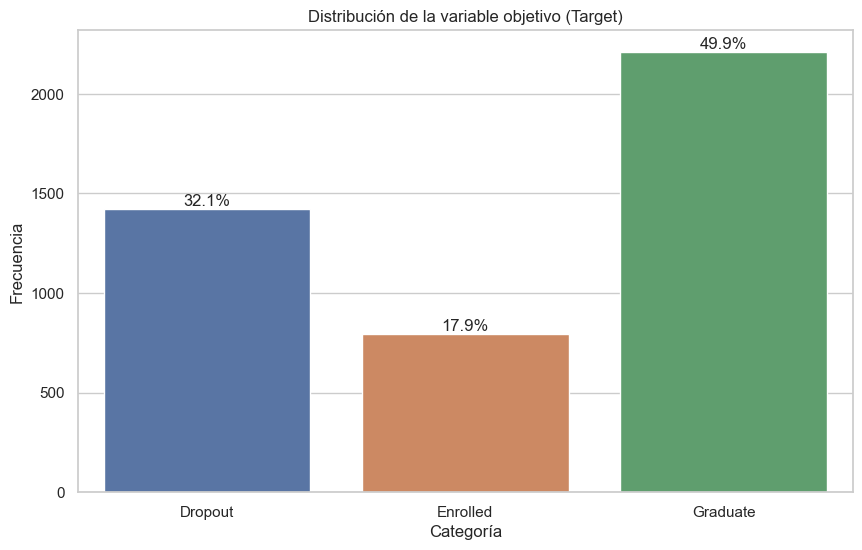

In [97]:
# Convertir la variable Target a tipo categórico
df["Target"] = df["Target"].astype("category")

# Ver distribución de clases
print("\nDistribución de la variable objetivo:")
print(df["Target"].value_counts())

# Visualizar la distribución
ax=sns.countplot(x="Target", data=df)
plt.title("Distribución de la variable objetivo (Target)")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")

total = len(df['Target'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


Podemos apreciar que la variable objetivo tiene 3 clases:

- `Dropout`: Estudiante que abandonó la universidad

- `Enrolled`: Estudiante que sigue en la universidad

- `Graduate`: Estudiante graduado de la universidad

Además, se ve un claro desbalance de los datos en esta variable.


Dado que nuestro objetivo final es predecir qué estudiantes van a abandonar la universidad, podemos resumir el problema en uno de clasificación binaria, tomando los registros de las clases `Enrolled` y `Graduate` como uno solo llamado `Not Dropout`:

In [98]:
df['Target'] = df['Target'].map({
    'Dropout': "Dropout",
    'Enrolled': "Not Dropout",
    'Graduate': "Not Dropout"
})

# Verificamos la codificación
print(df['Target'].value_counts())

Target
Not Dropout    3003
Dropout        1421
Name: count, dtype: int64


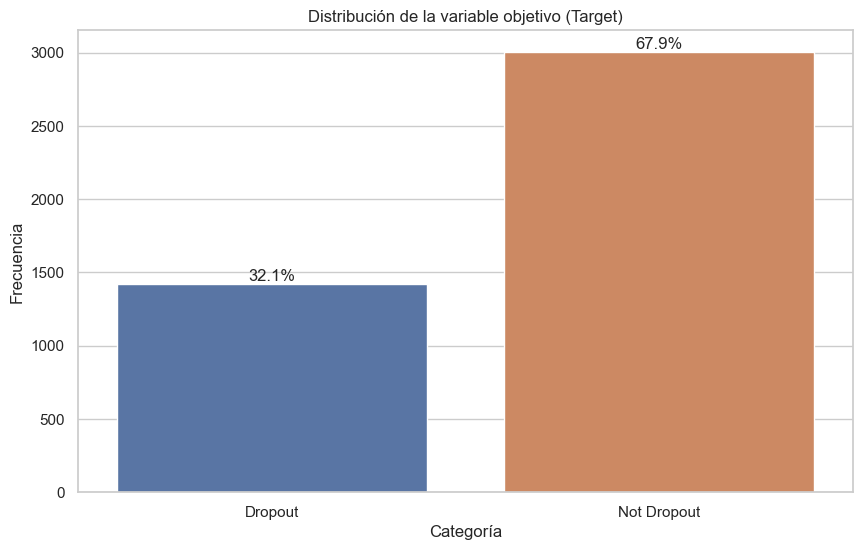

In [99]:



# Volvemos a visualizar la distribución
ax=sns.countplot(x="Target", data=df)
plt.title("Distribución de la variable objetivo (Target)")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")

total = len(df['Target'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


Ahora, sabiendo que el `67.9%` de los registros corresponden a los estudiantes que no abandonaron, y que el `32.1%` a los que sí, nos damos cuenta una vez más del desbalance con el que cuentan los datos.

### 1.6 Análisis de las categóricas vs el target

Veamos como se comportan las variables categóricas dependiendo de si el estudiante abandonó o no.

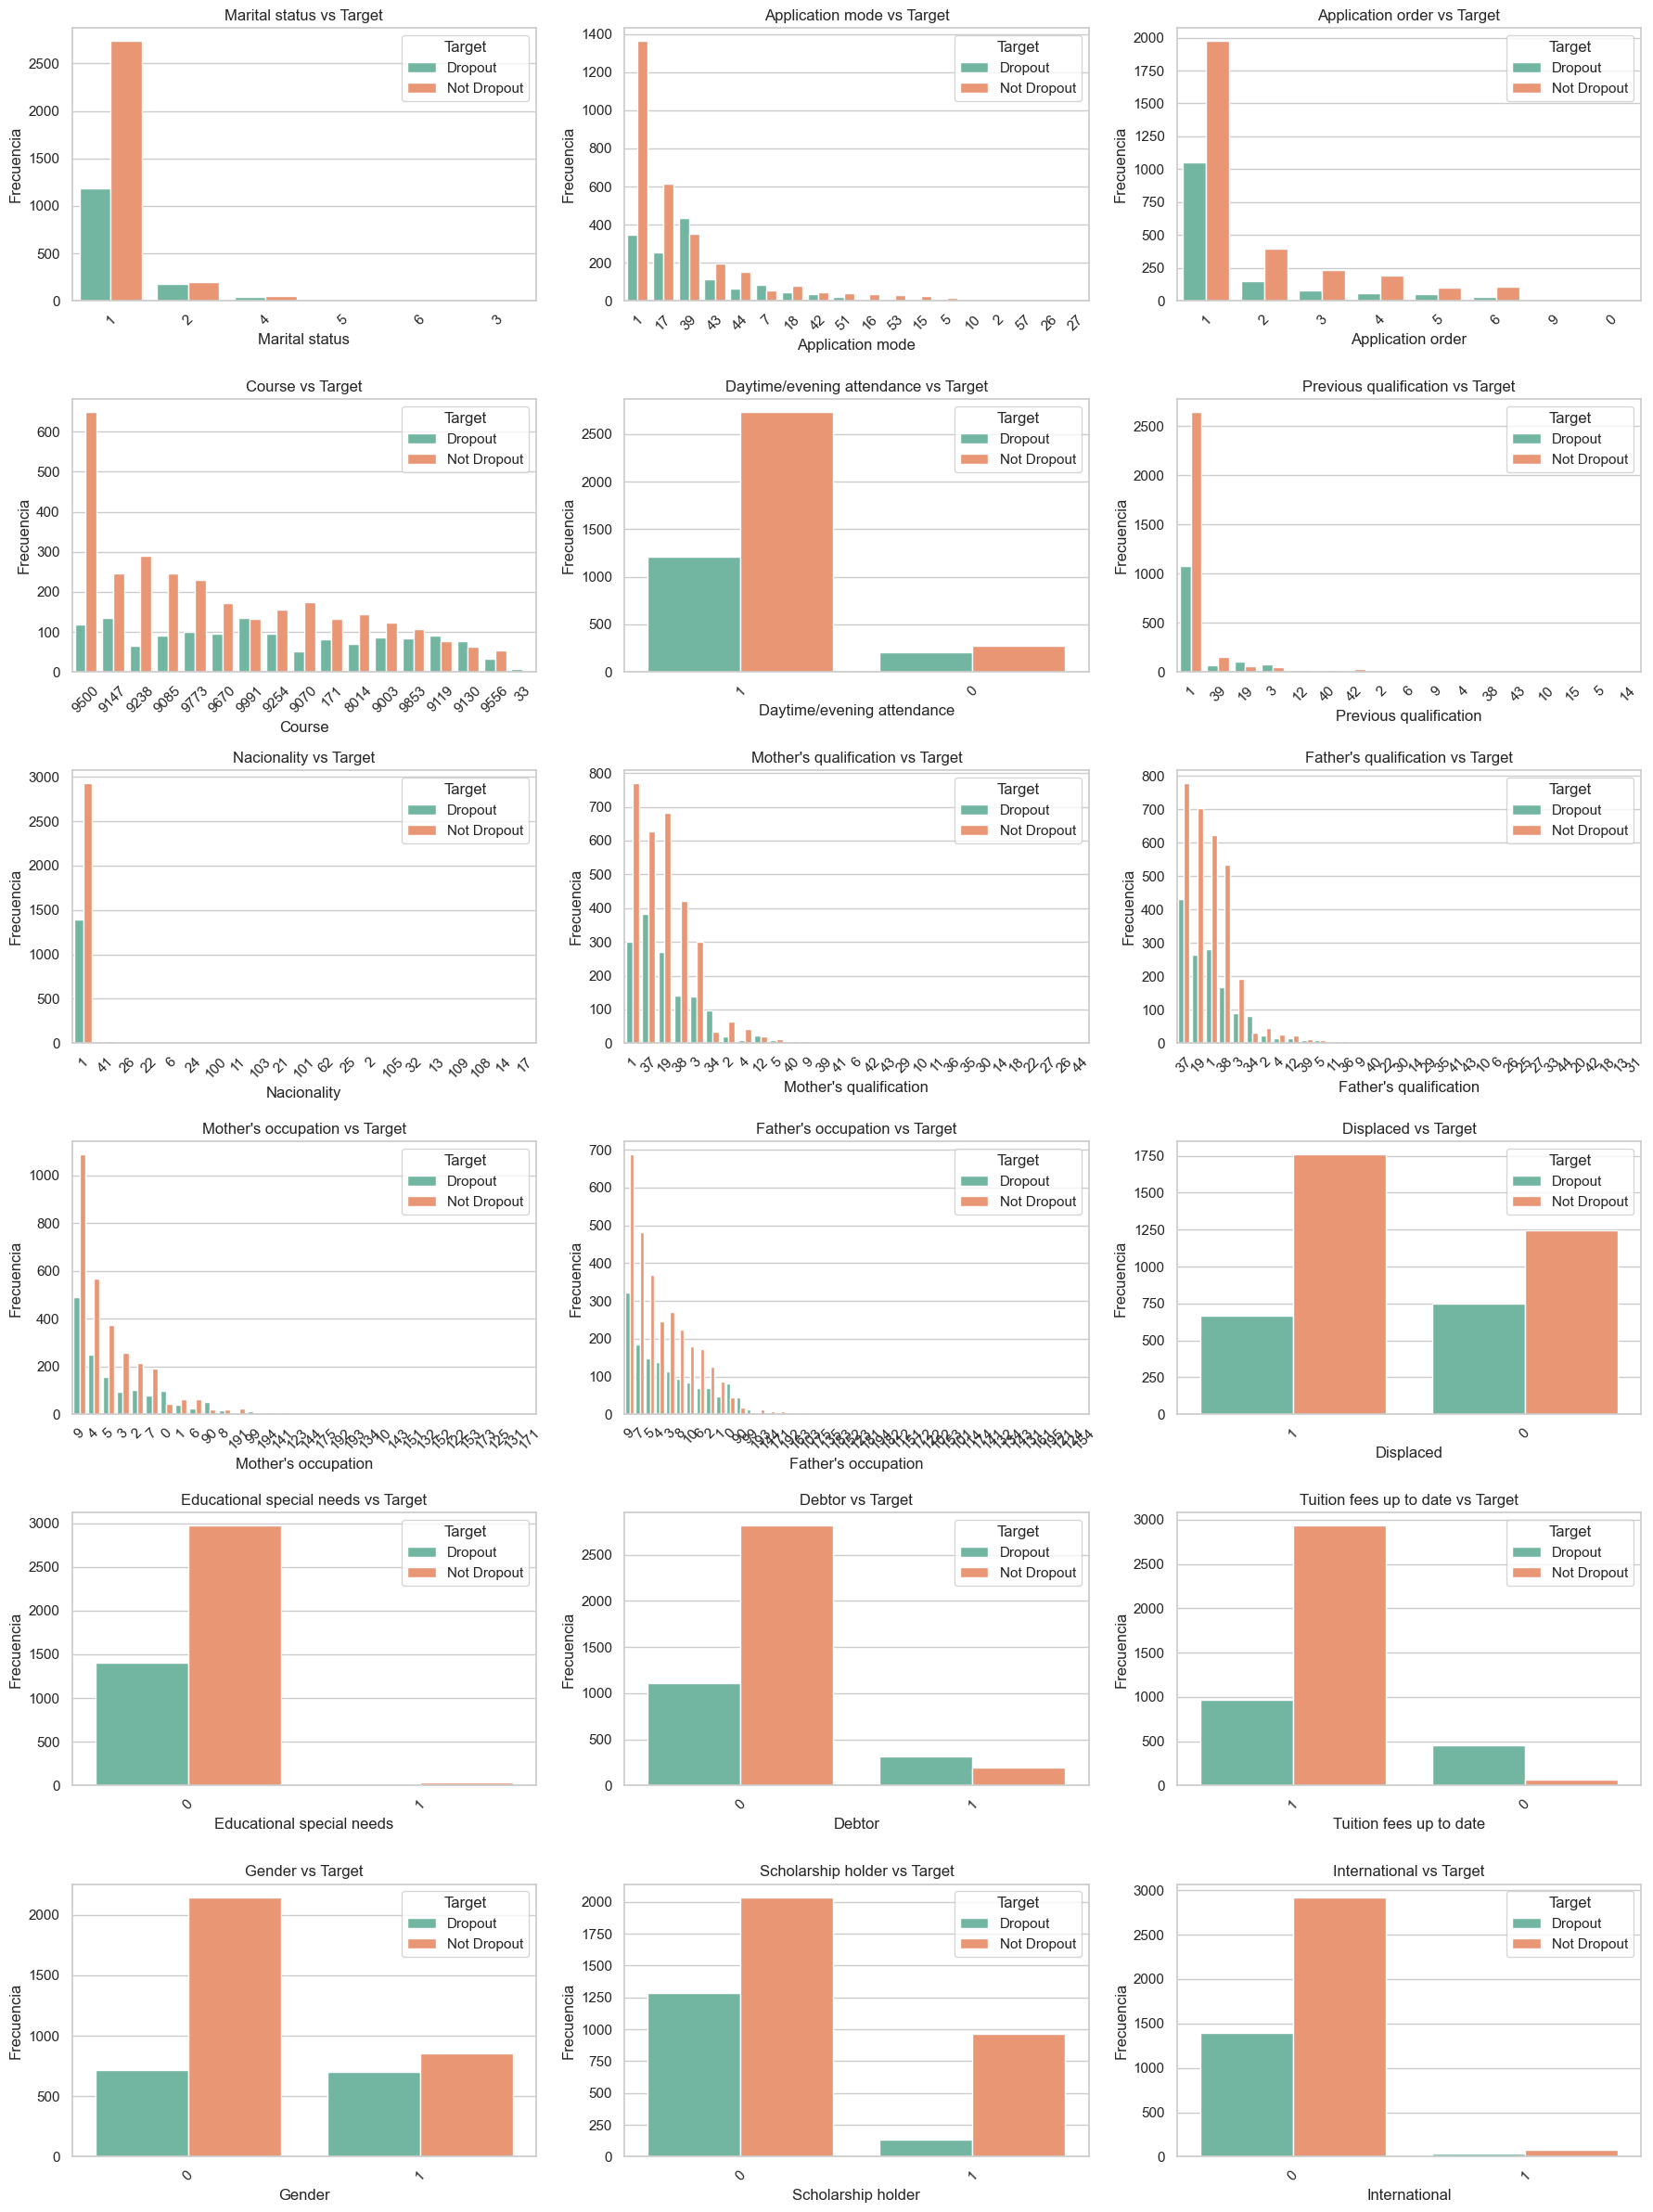

In [100]:
# Mostrar todos los gráficos de barras en una sola imagen (subplots)


n = len(categorical_columns)
cols = 3  # Número de columnas de subplots (ajusta según prefieras)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Target', order=df[col].value_counts().index, palette="Set2", ax=axes[i])
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Target')

# Eliminar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

De estos gráficos podemos concluir varias cosas:

- En la variable `Marital Status`, las categorías mas influyentes son: soltero`(1)` y casado`(2)`. Aún teniendo en cuenta que hay un desbalance en la clases del target, la proporción de abandono de los estudiantes casados es bastante alta. 

- De la variable `Course` observamos que, a excepción de unos cuantos cursos, la proporción de abandono es relativamente baja.

- De la variable `Gender`, la proporción de hombres `(1)` que abandonan los estudios es muy alta, mientras que la de mujeres `(0)` no tanto.

### 1.7 Visualización de las variables numéricas

#### 1.7.1 Histogramas

Primero, veamos cómo se distribuyen las variables numéricas por medio de histogramas.

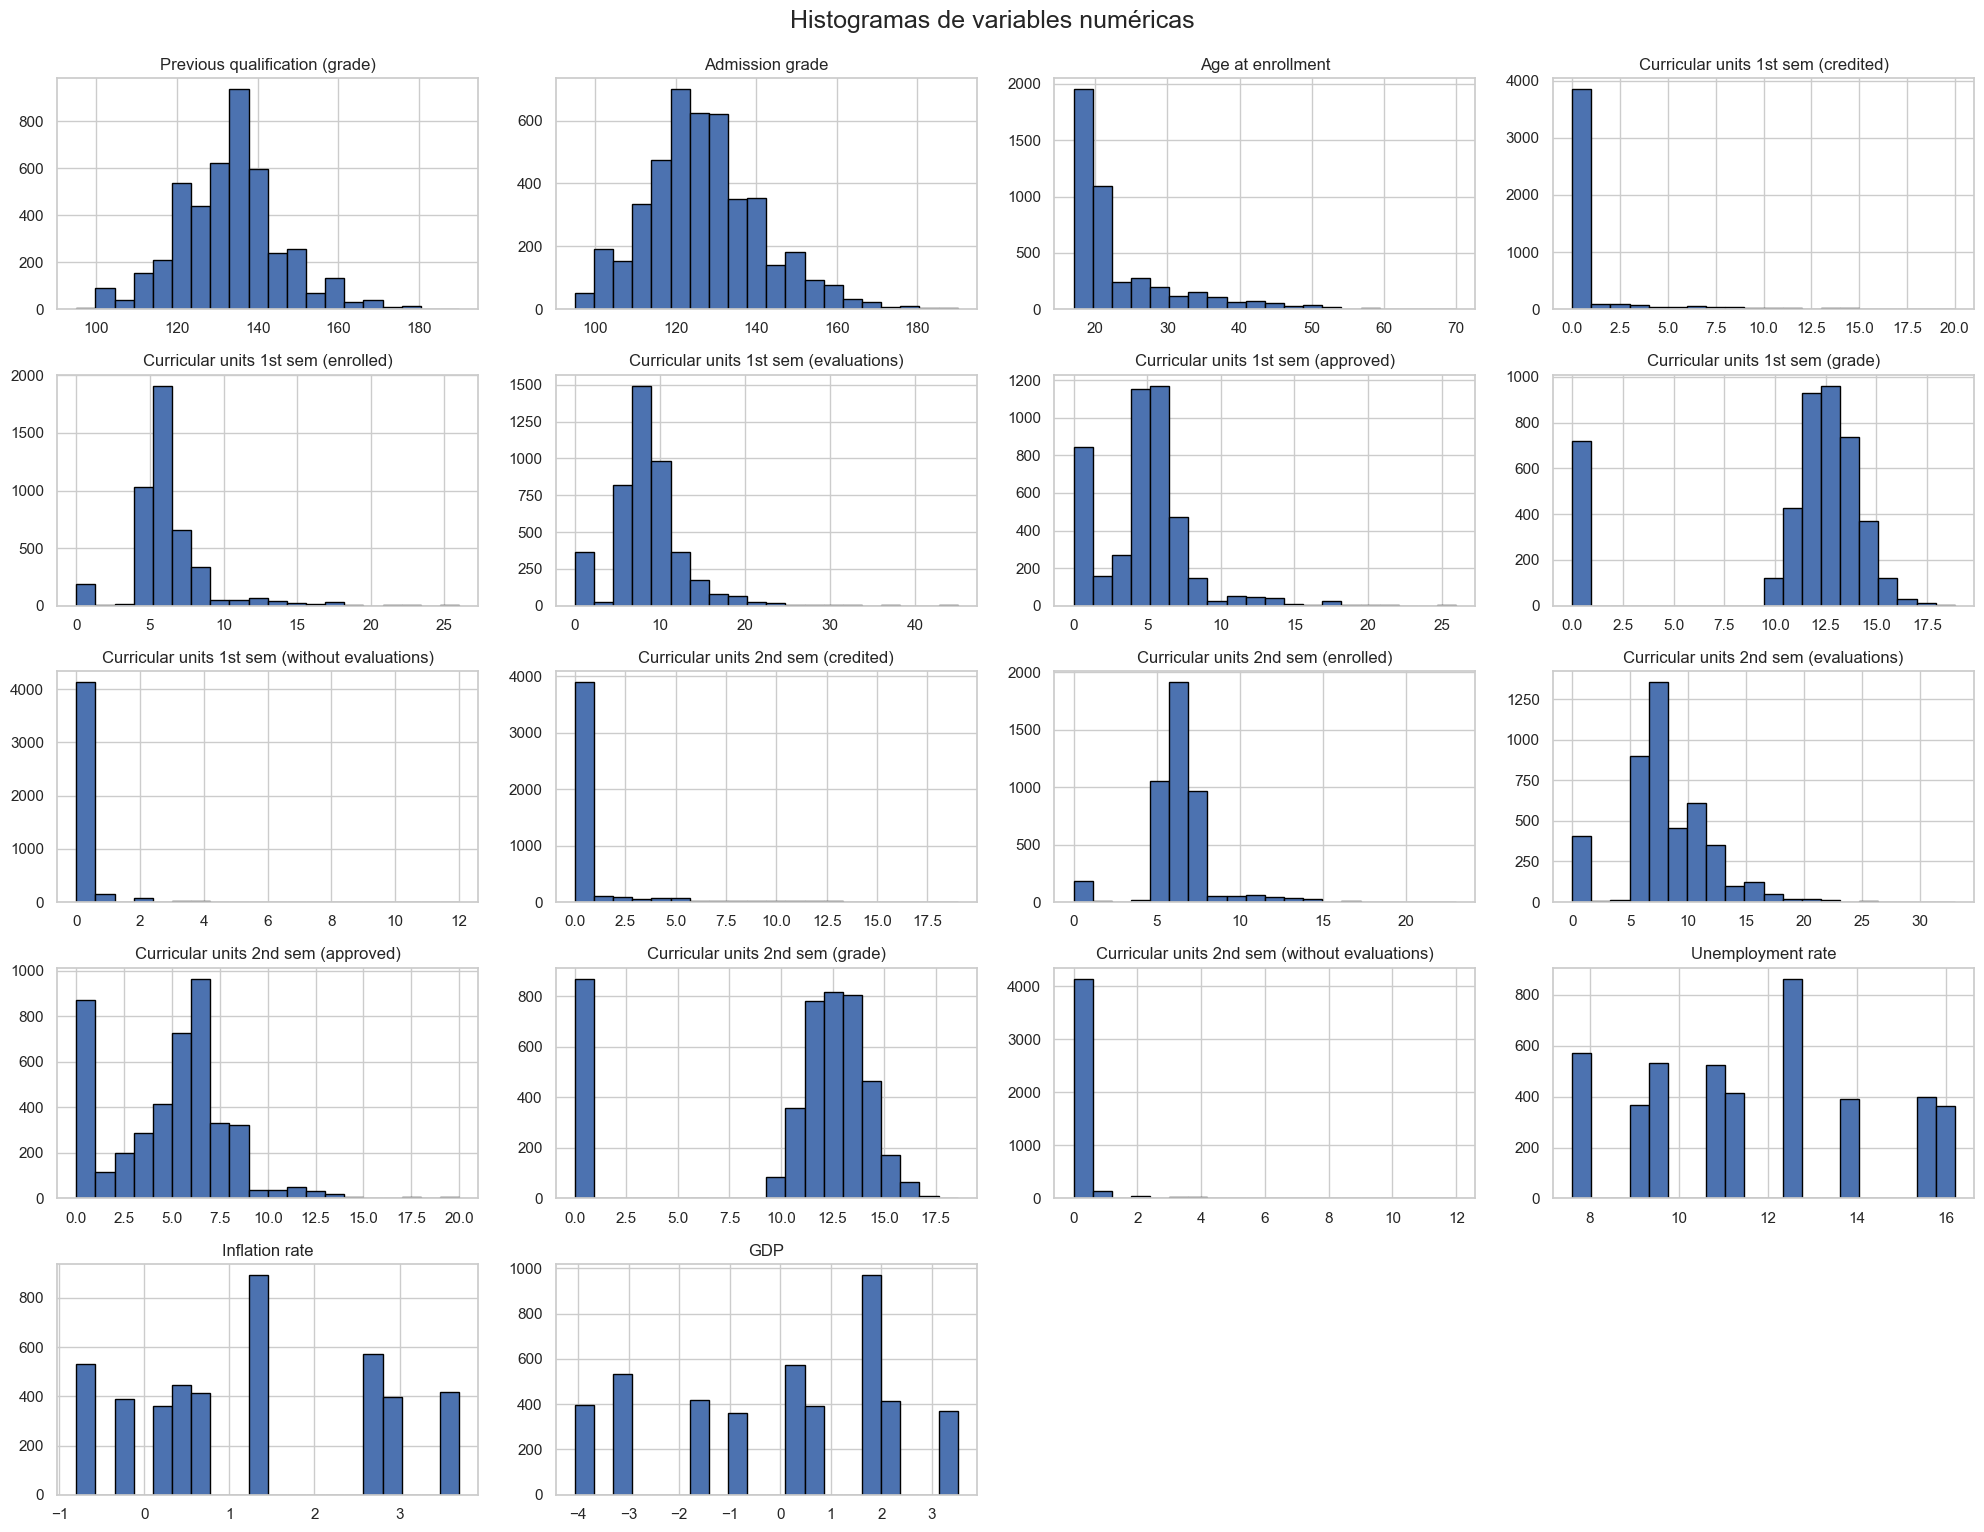

In [101]:
# Visualización de histogramas
df[numerical_columns].hist(figsize=(20, 15), bins=20, edgecolor='black')
plt.tight_layout()
plt.suptitle("Histogramas de variables numéricas", fontsize=18, y=1.02)
plt.show()


De estos histogramas notamos varias cosas:

- Solo la variable `Previous qualification (grade)` parece tener distribución normal.

- Como se anticipó en el resumen numérico, la gran mayoría de los registros de las variables :`Curricular units 1st sem (credited)`, `Curricular units 2nd sem (credited)`, `Curricular units 1st sem (without evaluation)` y `Curricular units 2nd sem (without evaluation)`, giran en torno a 0, debido a que no es tan común que muchos estudiantes homologuen asignaturas o no se presenten a las evaluaciones correspondientes.

- Variables como `Admission grade` , `Age at enrollment`, `Curricular units 1st sem (credited)`, `Curricular units 1st sem (enrolled)`,`Curricular units 1st sem (evaluations)`,`Curricular units 1st sem (without evaluations)`,`Curricular units 2nd sem (credited)`,`Curricular units 2nd sem (enrolled)`,`Curricular units 2nd sem (evaluations)` y `Curricular units 2nd sem (without evaluations)` tienen un sesgo a la derecha.

#### 1.7.2 Boxplot y detección de outliers

En esta sección veremos otra forma de ver la distribución de los datos y la cantidad de outliers que tienen.

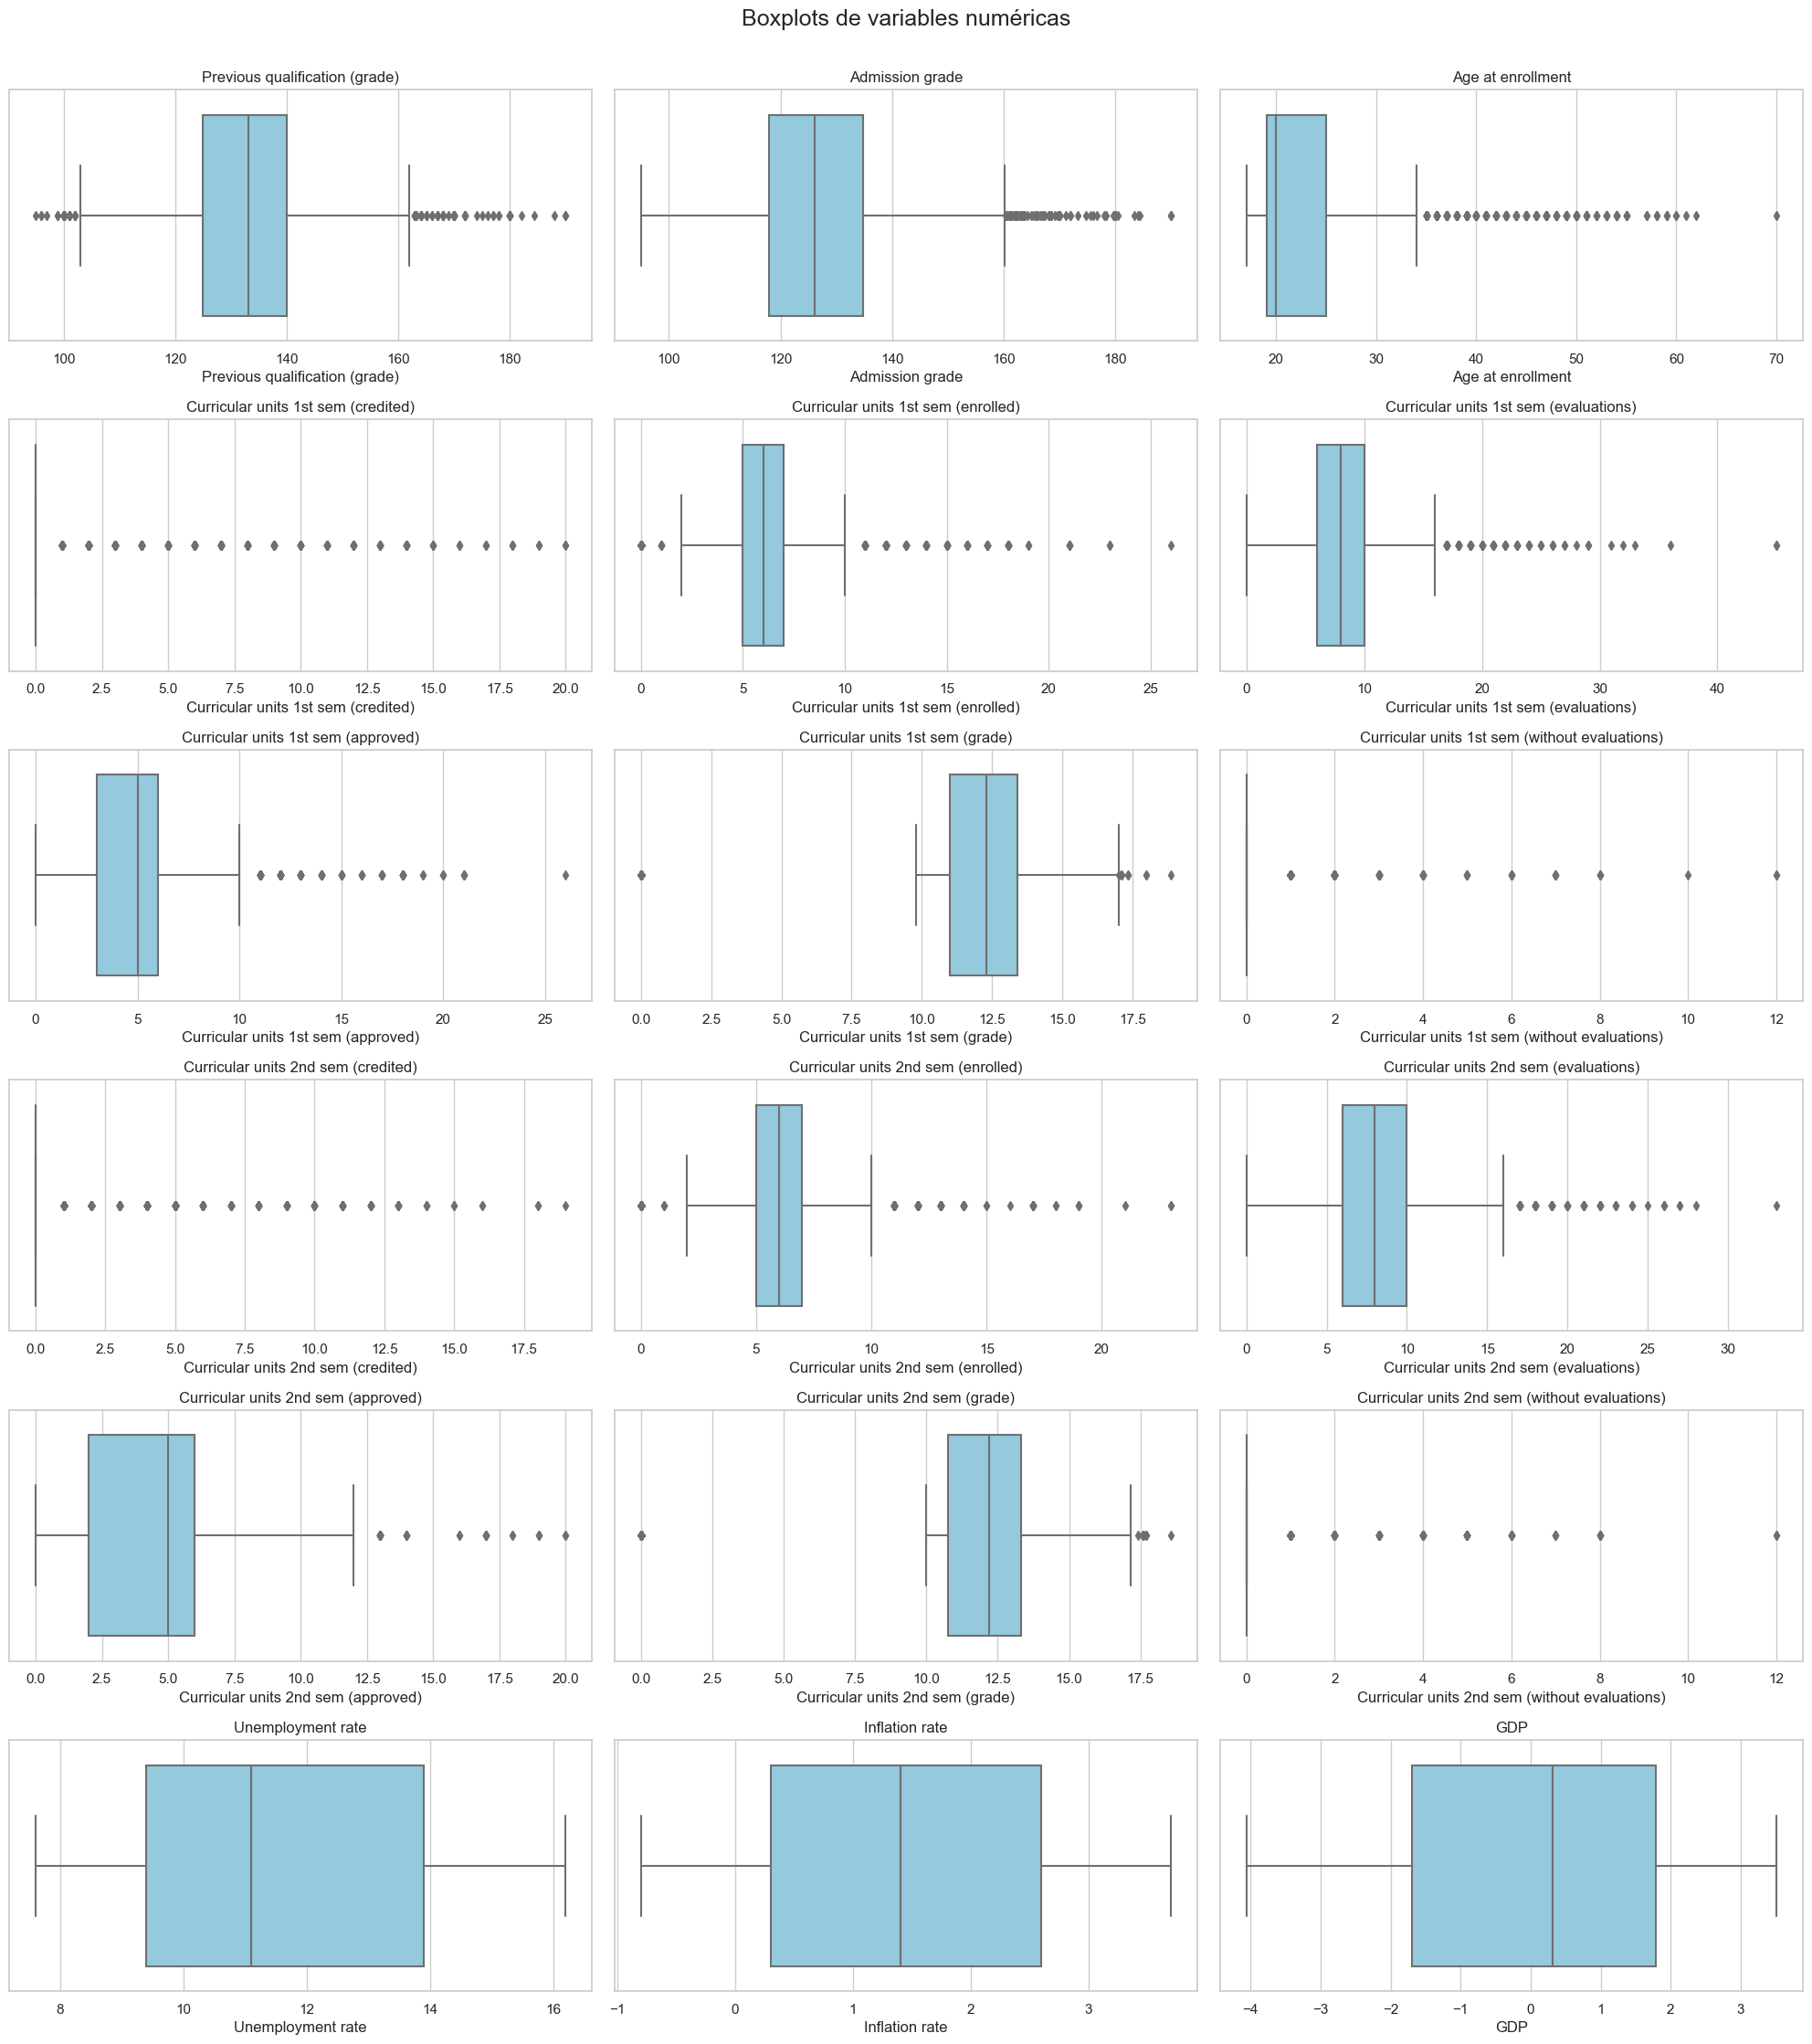

In [102]:
# Visualización: boxplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots de variables numéricas", fontsize=18, y=1.02)
plt.show()


De estas gráficas podemos notar que:

- Las variables `Unemployment rate`, `Inflation rate` y `GDP` son las únicas que no tienen outliers.

- Variables que representan notas como lo son: `Curricular units 1st sem (grade)`y `Curricular units 2nd sem (grade)` tienen valores atípicos no tan dispersos, esto se debe a que de por sí la caja es bastante compacta y son muy pocas las notas casi perfectas o notas que demuestran la inasistencia al curso como lo es el 0.

- Variables como `Curricular units 1st sem (credited)`, `Curricular units 2nd sem (credited)`, `Curricular units 1st sem (without evaluations)`y `Curricular units 2nd sem (without evaluations)` tienen valores atípicos muy dispersos, lo cual encaja con la descripción vista en la sección anterior.

Ahora veamos una comparación con boxplots entre el grupo que abandonó y el que no lo hizo.

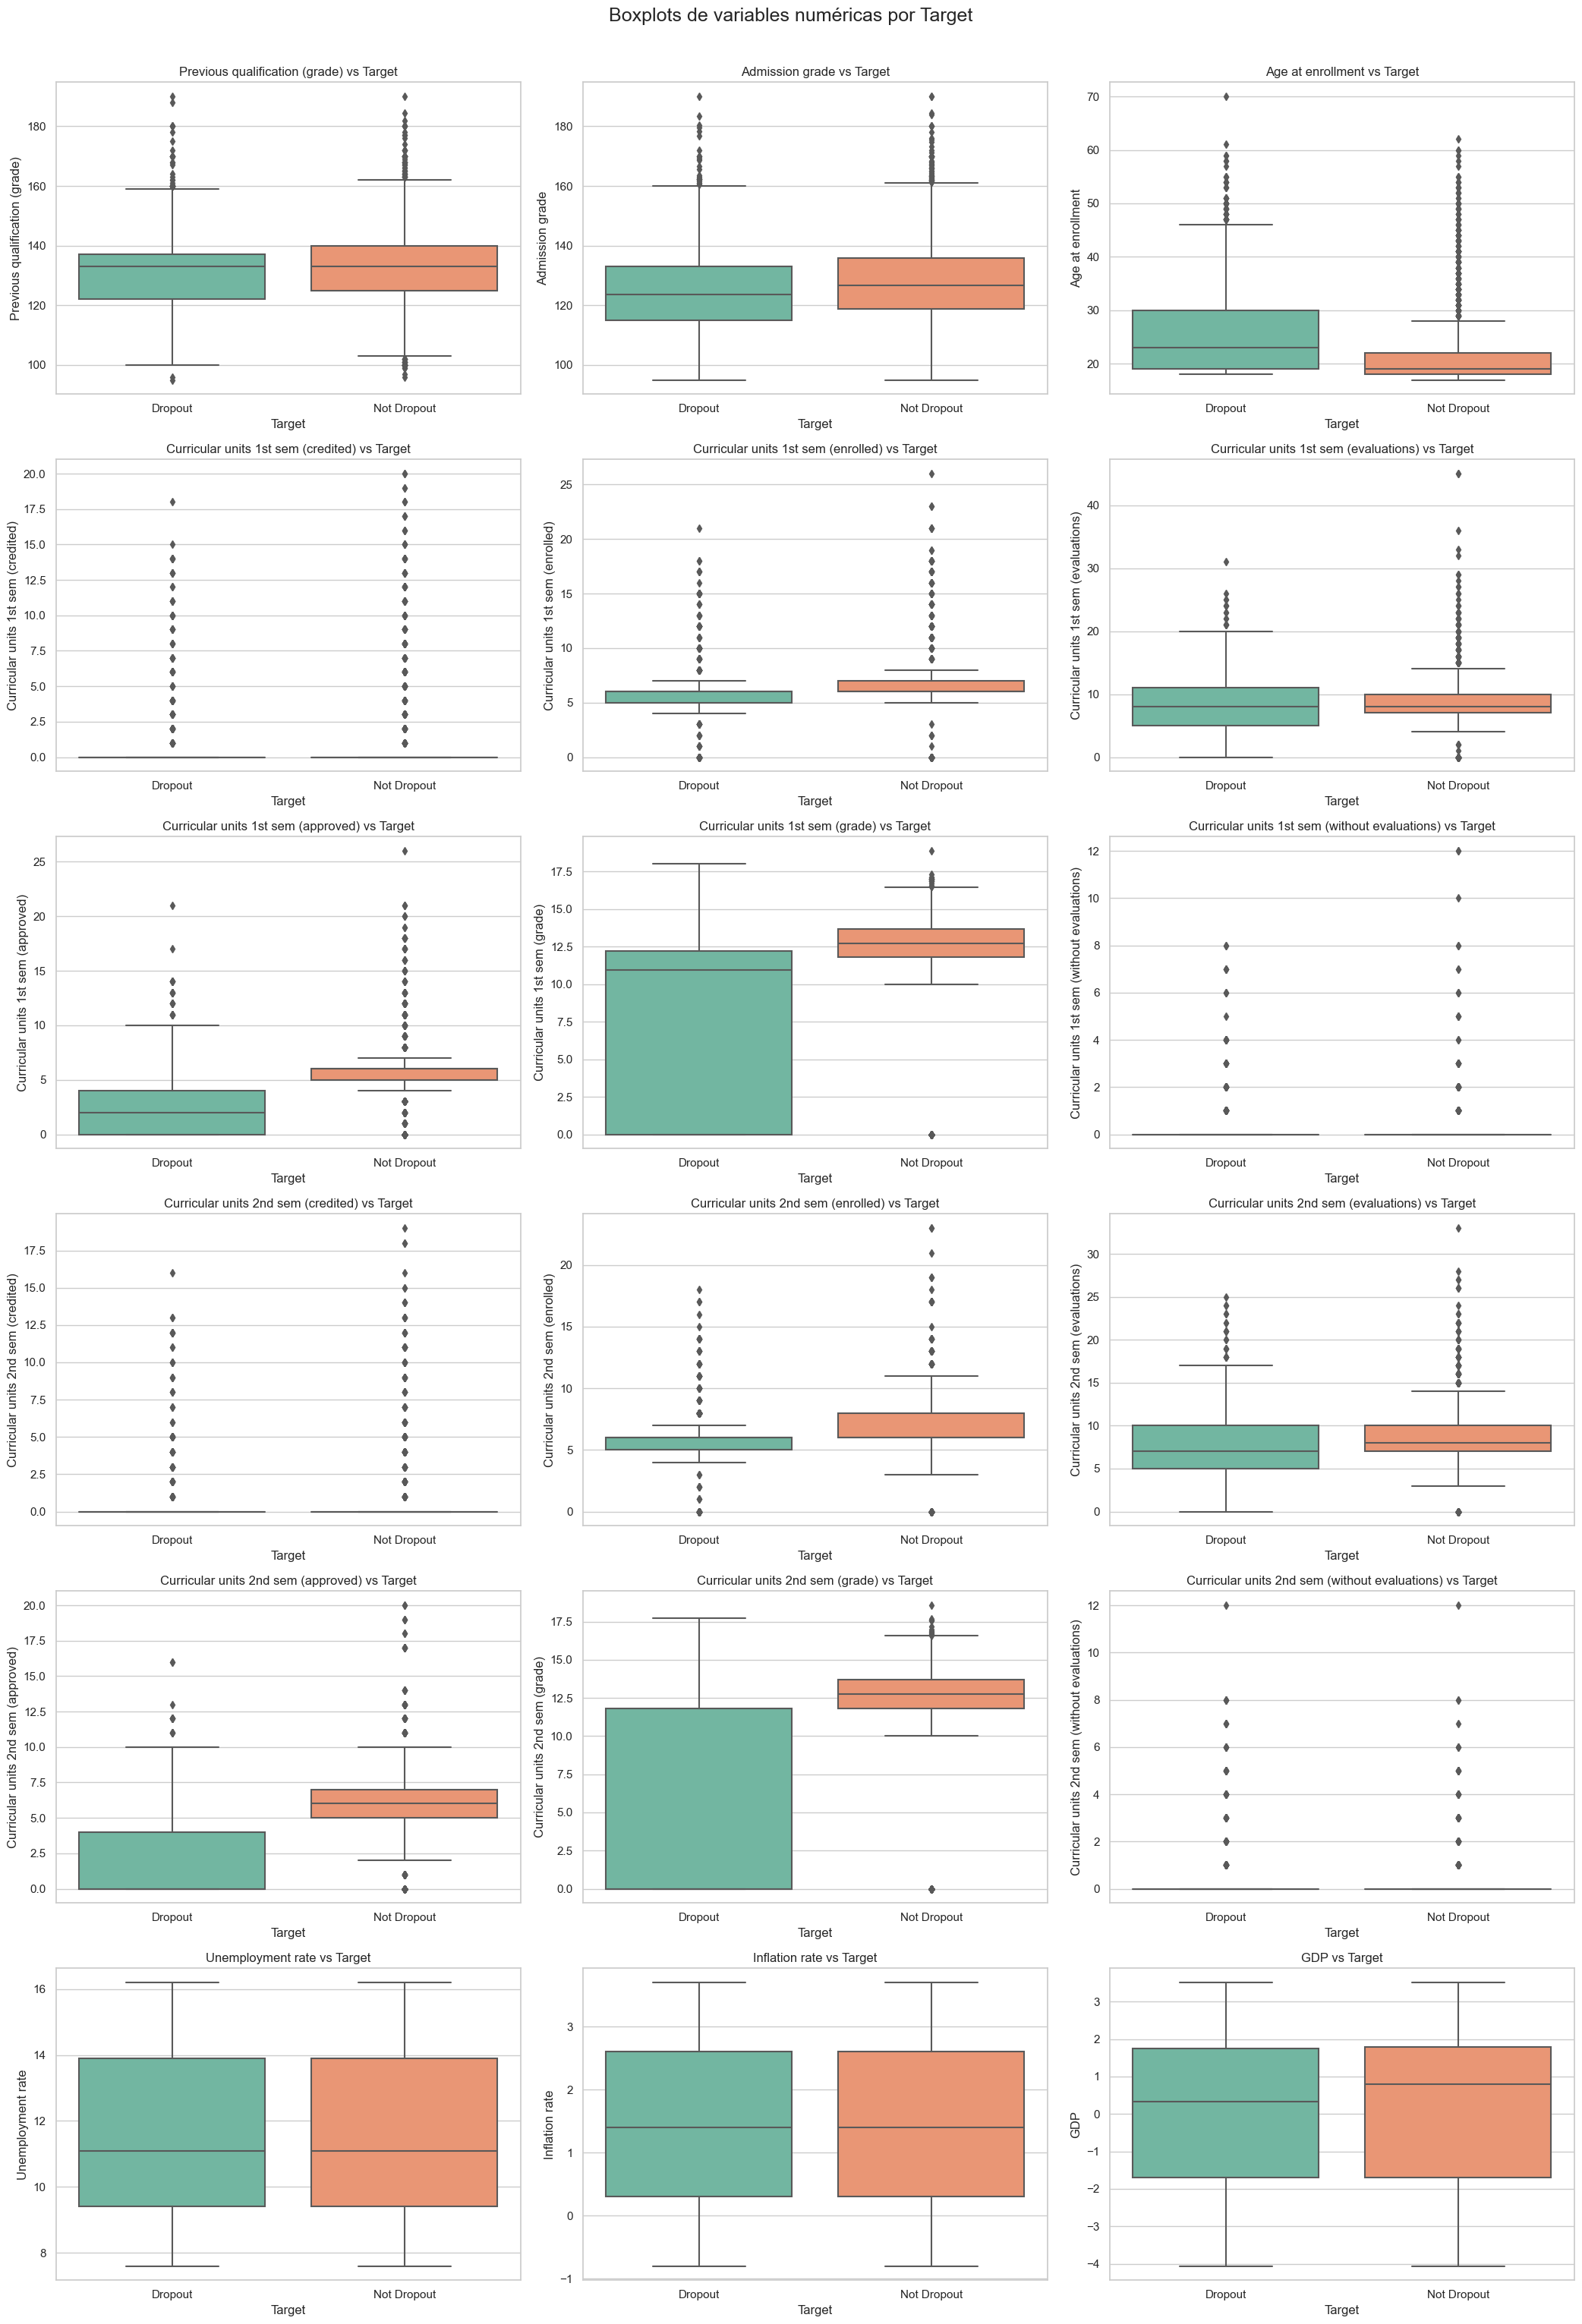

In [103]:

n = len(numerical_columns)
cols = 3  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*7, rows*5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Target', y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(col)

# Eliminar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots de variables numéricas por Target", fontsize=18, y=1.02)
plt.show()

Aquí podemos ver varias diferencias bastante marcadas:

- Como era de esperarse, y como se puede apreciar en los diagramas de las variables asociadas a las notas de cada semestre, `Curricular units 1st sem (grade)` y `Curricular units 2nd sem (grade)`, las personas con las nostas más bajas son las que tienden a retirarse de la universidad.
- Así mismo, las personas que ganan una mayor cantidad de materias en cada semestre, vea `Curricular units 1st sem (approved)`  y `Curricular units 2nd sem (approved)`, son las que tienden a quedarse estudiando.

- Los otros boxplots no muestran una relación tan directa como los ya mencionados.

En general, prácticamente todas las variables tienen valores atípicos, y esto no necesariamente debe significar que son registros erróneos, sino que al estar evaluando a tantas personas, siempre está la posibilidad de que algunos destaquen sobre el resto, ya sea en sus notas, favorable o desfavorablemente, en el número de materias inscritas, en el número de materias homologadas, etc. Por ello, vamos a ver la cantidad de outliers que hay por variable.

In [104]:
#Función para detectar outliers usando IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((serie < lower) | (serie > upper))

# Contar outliers por variable
print("Conteo de outliers por variable numérica:")
for col in numerical_columns:
    outliers = detectar_outliers_iqr(df[col])
    print(f"{col}: {outliers.sum()} outliers detectados")

Conteo de outliers por variable numérica:
Previous qualification (grade): 179 outliers detectados
Admission grade: 86 outliers detectados
Age at enrollment: 441 outliers detectados
Curricular units 1st sem (credited): 577 outliers detectados
Curricular units 1st sem (enrolled): 424 outliers detectados
Curricular units 1st sem (evaluations): 158 outliers detectados
Curricular units 1st sem (approved): 180 outliers detectados
Curricular units 1st sem (grade): 726 outliers detectados
Curricular units 1st sem (without evaluations): 294 outliers detectados
Curricular units 2nd sem (credited): 530 outliers detectados
Curricular units 2nd sem (enrolled): 369 outliers detectados
Curricular units 2nd sem (evaluations): 109 outliers detectados
Curricular units 2nd sem (approved): 44 outliers detectados
Curricular units 2nd sem (grade): 877 outliers detectados
Curricular units 2nd sem (without evaluations): 282 outliers detectados
Unemployment rate: 0 outliers detectados
Inflation rate: 0 outlier

Como vemos, hay bastantes outliers, esto más que nada se debe a que, al ser registros de notas de diferentes alumnos, hay bastantes que se destacan por encima del resto, por lo que pueden ser marcados como outliers.

### 1.8 Matriz de correlación

Veamos ahora la matriz de correlación para las variables numéricas:

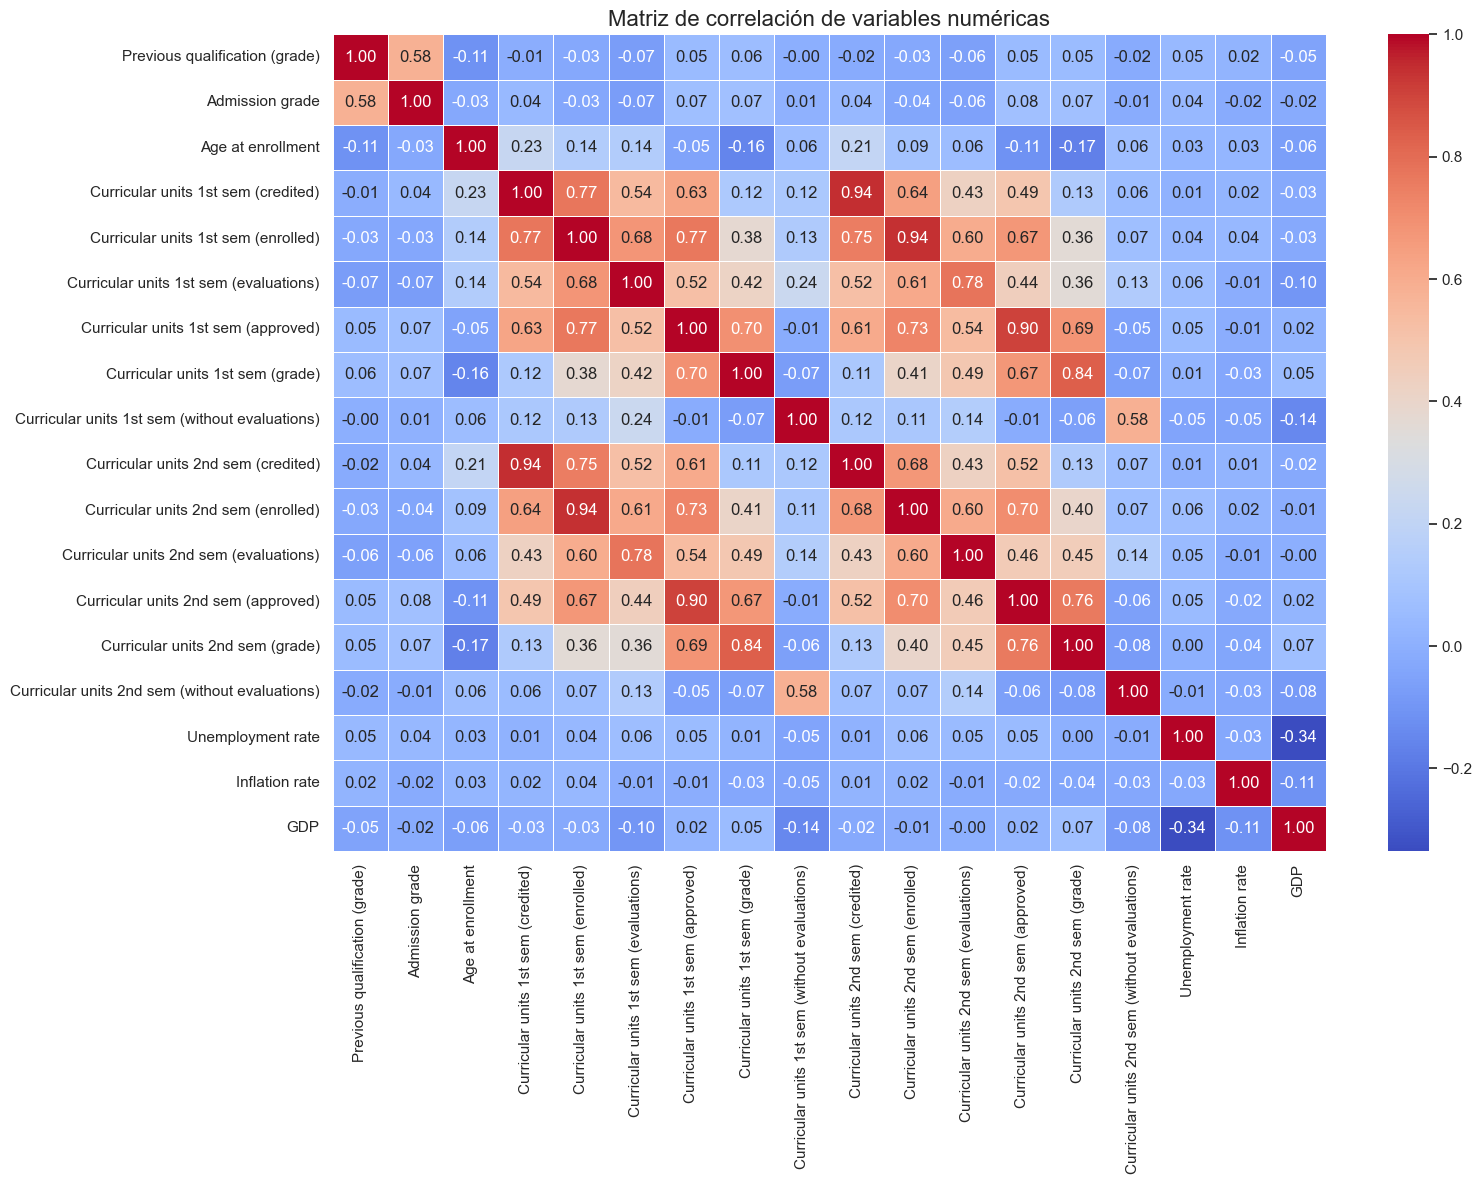

In [105]:
# Matriz de correlación
plt.figure(figsize=(16, 12))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


Veamos cuales son las variables que mas se relacionan entre sí:

- `Previous qualification (grade)`y `Admission grade`: Por su misma definición, tiene sentido que estén algo relacionadas, ya que ambas notas son de antes de entrar a la universidad, así que sus notas puede que no varíen tanto de un momento a otro, lo cual es confimado por la matriz

- En general podemos ver una gran correlación entre las materias aprobadas de cada semestre, las notas conseguidas de cada semestre y las materias matriculadas en cada semestre, lo cual indica un desempeño similar para los estudiantes en los dos semestres.

### 1.9 Conclusión del Análisis exploratorio de datos (EDA)

Gracias a este análisis exploratorio, podemos darnos mejores ideas de como se comportan los datos:

- Nos brindó el hecho de que **no hay datos faltantes**, lo cual evita que hagamos una imputación innecesaria de datos.

- A su vez pudimos confirmar que variables como las notas conseguidas en los 2 semestres, `Curricular units 1st sem (grade)` y `Curricular units 2 sem (grade)`, tienen una alta relación con el hecho de que un estudiante abandone o no la universidad.

- Los **outliers**, aunque son muchos, pueden ser tratados con el fin de mejorar el rendimiento del modelo.

Luego de realizar este análisis exploratorio, podemos empezar a implementar tanto el modelo de clasificación, como el modelo de regresión, para predecir si un estudiante abandonará la universidad o no, y su promedio, respectivamente.

## 2. Modelo K-nn

### 2.1 Modelo de clasificación binaria

Primero, vamos a codificar numéricamente la variable objetivo, previamente modificada para atender a un problema de clasificación binaria.

In [106]:
# Codificamos manualmente la variable objetivo 'Target' para clasificación binaria
# 1 → Estudiante que abandonó (Dropout)
# 0 → Estudiante que sigue activo (Enrolled) o se graduó (Graduate), ambas categorías se consideran como "Not Dropout"
df['Target'] = df['Target'].map({
    'Dropout': 1,
    'Not Dropout': 0,
})

# Verificamos la codificación
print(df['Target'].value_counts())


Target
0    3003
1    1421
Name: count, dtype: int64


Luego, separamos las características y la variable objetivo, con el fin de usarla posteriormente para entrenar al modelo.

In [107]:
#Separamos las características y la variable objetivo
# 'X' contiene todas las columnas excepto 'Target'
# 'y' contiene únicamente la columna objetivo ya codificada (abandona = 1, no abandona = 0)
X = df.drop(columns=['Target'])
y = df['Target']

Verificamos que todo haya salido bien.

In [108]:
# Mostrar la lista completa de nombres de columnas en X
# Esto es útil para verificar qué variables están disponibles después de eliminar 'Target'
print(X.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


Dado que todo fue separado correctamente, procedemos a importar las librerias necesarias para el modelo K-nn:

In [109]:

from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

#### 2.1.1 Búsqueda del mejor K

Primero que todo, queremos encontrar el número de vecinos óptimo para encontrar el modelo de mejor rendimiento, para esto, primero dividimos el conjunto de datos con la función `train_test_split`, dejando un conjunto de test para la evaluación del modelo, esto con el fin de que la selección del mejor parámetro k no interfiera en el resultado del entrenamiento. Luego, mediante validación cruzada manual, dividimos nuevamente el conjunto de entrenamiento y entrenamos los modelos con cada número de k vecinos, desde el 1 hasta el 20, y luego guardamos en una lista los scores conseguidos por accuracy en el entrenamiento y la validación, y los scores de precision, recall y f1-score.

In [110]:
# Seleccionar variables numéricas reales
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_columns)
# ====== DIVISIÓN INICIAL: train+val y test ======
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,  stratify=y, random_state=0
)

# ====== VALIDACIÓN CRUZADA MANUAL EN trainval ======
resultados_k = []

for k in range(1, 21):
    accuracy_val_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    # 5-fold split manual usando train_test_split en cada fold
    for seed in range(5):
        X_train, X_val, y_train, y_val = train_test_split(
            X_trainval, y_trainval,  stratify=y_trainval, random_state=seed
        )

        # One-hot encoding por fold
        X_train_enc = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
        X_val_enc = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
        X_train_enc, X_val_enc = X_train_enc.align(X_val_enc, join='left', axis=1, fill_value=0)

        # Escalado solo numérico
        num_cols_to_scale = numerical_columns.intersection(X_train_enc.columns)
        scaler = StandardScaler()
        X_train_scaled = X_train_enc.copy()
        X_val_scaled = X_val_enc.copy()
        X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train_enc[num_cols_to_scale])
        X_val_scaled[num_cols_to_scale] = scaler.transform(X_val_enc[num_cols_to_scale])

        # Convertir a arrays
        X_train_final = X_train_scaled.values
        X_val_final = X_val_scaled.values

        # Modelo
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_final, y_train)

        # Predicciones
        y_pred_val = model.predict(X_val_final)
        y_pred_train = model.predict(X_train_final)

        # Métricas
        accuracy_val_list.append(accuracy_score(y_val, y_pred_val))
        precision_list.append(precision_score(y_val, y_pred_val, pos_label=1))
        recall_list.append(recall_score(y_val, y_pred_val, pos_label=1))
        f1_list.append(f1_score(y_val, y_pred_val, pos_label=1))

    # Guardar resultados de este k
    resultados_k.append({
        'k': k,
        'Accuracy_val': np.mean(accuracy_val_list),
        'Precision': np.mean(precision_list),
        'Recall': np.mean(recall_list),
        'F1-score': np.mean(f1_list)
    })

# Convertir a DataFrame
df_resultados_original = pd.DataFrame(resultados_k)
df_resultados_original['Observaciones'] = len(X_trainval)
df_resultados_original['Dataset'] = 'Original'

# Mantén ambas columnas para la gráfica Train vs Val
df_resultados_original = df_resultados_original[[
    'k', 'Accuracy_val', 'Precision', 'Recall', 'F1-score',
    'Observaciones', 'Dataset'
]]



In [111]:
print("\n Métricas promedio por valor de k (5-fold CV manual):")
print(df_resultados_original.round(4))


 Métricas promedio por valor de k (5-fold CV manual):
     k  Accuracy_val  Precision  Recall  F1-score  Observaciones   Dataset
0    1        0.7930     0.7060  0.6120    0.6553           3318  Original
1    2        0.8118     0.8975  0.4682    0.6150           3318  Original
2    3        0.8227     0.8145  0.5813    0.6780           3318  Original
3    4        0.8159     0.8791  0.4959    0.6339           3318  Original
4    5        0.8234     0.8284  0.5693    0.6743           3318  Original
5    6        0.8154     0.8776  0.4959    0.6333           3318  Original
6    7        0.8229     0.8461  0.5498    0.6662           3318  Original
7    8        0.8212     0.8900  0.5071    0.6457           3318  Original
8    9        0.8227     0.8615  0.5348    0.6596           3318  Original
9   10        0.8210     0.8928  0.5041    0.6441           3318  Original
10  11        0.8234     0.8746  0.5266    0.6571           3318  Original
11  12        0.8224     0.9036  0.5019    0.

Cabe aclarar una cosa muy importante que no ha sido mencionada a lo largo de este proyecto: la estandarización y codificación de las variables númericas y categóricas respectivamente.

Decidimos realizar estos procesos luego de dividir el conjunto de entrenamiento por segunda ocasión ya que esto evita el `data leakage`, por lo que el preprocesamiento de datos se realizará luego de cada división de los mismos en cada entrenamiento de un modelo.



Ahora, luego de conseguir los scores para cada k, veamos gráficamente que tal se comportan.

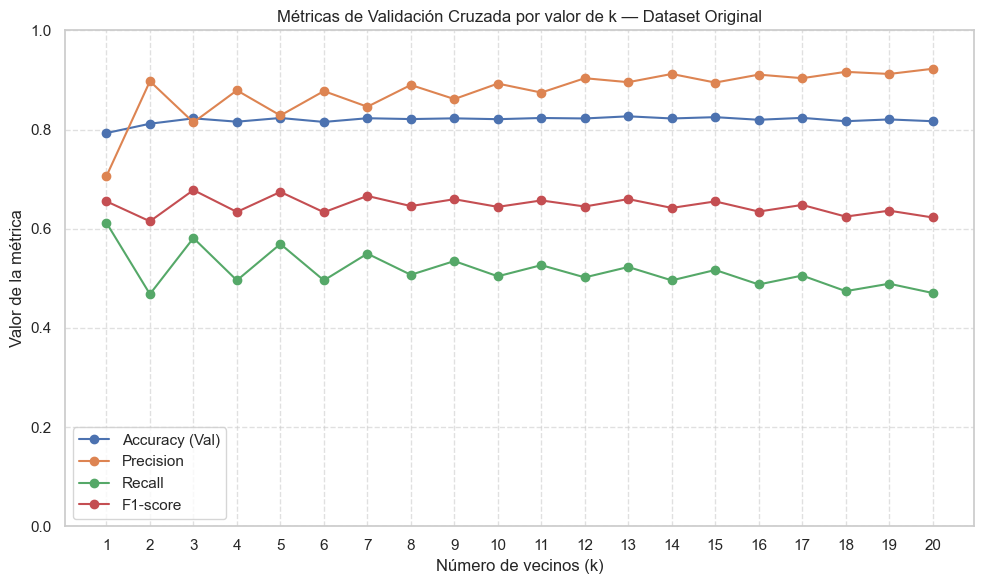

In [112]:
# Asegura orden por k
orig = df_resultados_original.sort_values('k')

plt.figure(figsize=(10, 6))
plt.plot(orig['k'], orig['Accuracy_val'],  marker='o', label='Accuracy (Val)')
plt.plot(orig['k'], orig['Precision'], marker='o', label='Precision')
plt.plot(orig['k'], orig['Recall'],    marker='o', label='Recall')
plt.plot(orig['k'], orig['F1-score'],  marker='o', label='F1-score')

plt.title('Métricas de Validación Cruzada por valor de k — Dataset Original')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Valor de la métrica')
plt.xticks(range(1, 21))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Gracias a este gráfico nos podemos dar cuenta de como va cambiando el rendimiento del modelo a medida que cambiamos la k. Para escoger al mejor k, decidimos usar la métrica f1-score, ya que nos parece mejor para definir el objetivo del modelo el cual es ver los alumnos que abandonaron la universidad, ya que tanto un falso positivo como un falso negativo nos parece igual de grave para la generalización del modelo.

#### 2.1.2 Entrenamiento del modelo con el mejor K, matriz de confusión y métricas precision, recall y f1-score

Así pues, y usando el conjunto de test anteriormente establecido para evaluar mejor el modelo, entrenamos el modelo con el mejor k, y el conjunto de entrenamiento que se estableció en primer lugar.

 Mejor k según F1-score: 3

 Matriz de confusión:
[[707  44]
 [131 224]]


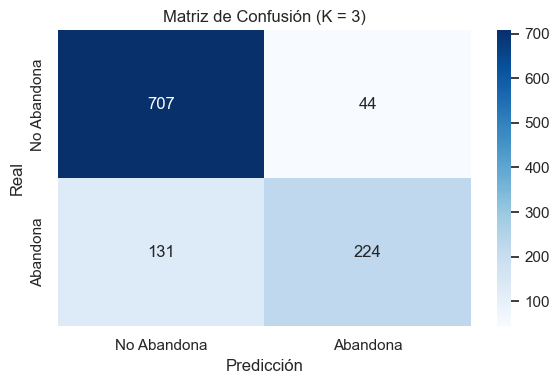


 Reporte de clasificación:
              precision    recall  f1-score   support

 No Abandona       0.84      0.94      0.89       751
    Abandona       0.84      0.63      0.72       355

    accuracy                           0.84      1106
   macro avg       0.84      0.79      0.80      1106
weighted avg       0.84      0.84      0.84      1106



In [113]:

# Seleccionar el mejor k según F1-score
best_k = int(df_resultados_original.loc[df_resultados_original['F1-score'].idxmax(), 'k'])
print(f" Mejor k según F1-score: {best_k}")

# Codificación one-hot
X_trainval_enc = pd.get_dummies(X_trainval, columns=categorical_columns, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_trainval_enc, X_test_enc = X_trainval_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# Escalado de variables numéricas reales
cols_to_scale = numerical_columns.intersection(X_trainval_enc.columns)
scaler = StandardScaler()
X_trainval_enc[cols_to_scale] = scaler.fit_transform(X_trainval_enc[cols_to_scale])
X_test_enc[cols_to_scale] = scaler.transform(X_test_enc[cols_to_scale])

# Convertir a arrays
X_trainval_final = X_trainval_enc.values
X_test_final = X_test_enc.values

# Entrenar el modelo final con best_k usando trainval
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_trainval_final, y_trainval)

# Predecir en test
y_pred_final = knn_final.predict(X_test_final)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
print("\n Matriz de confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandona', 'Abandona'],
            yticklabels=['No Abandona', 'Abandona'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión (K = {best_k})")
plt.tight_layout()
plt.show()

# 10. Reporte de clasificación
print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred_final, target_names=['No Abandona', 'Abandona']))

Gracias a la matriz de confusión, nos damos cuenta de que tan solo se obtuvieron 44 falsos positivos y 131 falsos negativos.

Además, el score dado por la métrica `f1-score` es de `0.72`, el cual es un puntaje bastante bueno, considerando 3 vecinos mas cercanos.

#### 2.1.3 Curva ROC y AUC

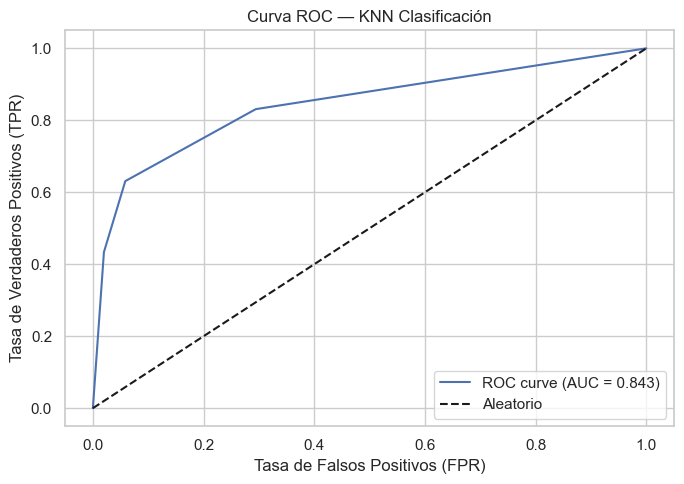

AUC (Área bajo la curva ROC): 0.8433


In [114]:

# === Curva ROC y AUC ===
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de clase positiva (abandona = 1)
y_proba = knn_final.predict_proba(X_test_final)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC — KNN Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"AUC (Área bajo la curva ROC): {auc_score:.4f}")

Se ve una ROC claramente por encima de la diagonal, con AUC ≈ 0.843. Eso significa que el modelo de clasificación para “abandona / no abandona” distingue bien entre ambos: si tomas un alumno que abandona y uno que no, el modelo tiene ~84% de probabilidad de asignar mayor score al que abandona.

### 2.2 Modelo de regresión

Para el modelo de regresión, el objetivo es predecir el índice acumulado esperado al final del semestre, por lo que debemos hacer algunos ajustes en los datos con el fin de que el modelo pueda ser entrenado correctamente.

Importamos algunas librerías necesarias para el modelo y su calificación.

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

Como queremos predecir la nota acumulada del estudiante, y solo tenemos los dos primeros semestres de su vida académica, entonces debemos promediar las notas de estos semestres:

In [116]:

df["Final_Average"] = df[[
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]].mean(axis=1)


Ahora viene un paso muy importante, dado que queremos predecir la nota acumulada del estudiante en los dos primeros semestres, no podemos usar los datos que se encuentran en las variables correspondientes al segundo semestre, ya que existiría una fuga de datos, ya que si no se hace esto, el modelo ya tendría la información necesaria para calcular el promedio y el modelo sería perfecto, lo cual sería engañoso.

In [117]:
cols_to_exclude = [
    "Target", "Final_Average",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (without evaluations)",
]
X_full = df.drop(columns=cols_to_exclude, errors="ignore").copy()
y_full = df["Final_Average"].to_numpy()

Separamos ahora las columnas categóricas de las numéricas:

In [118]:
categorical_columns = [c for c in categorical_columns if c in X_full.columns]

numeric_columns_pre_ohe = [
    c for c in X_full.select_dtypes(include=['float64','int64']).columns
    if c not in categorical_columns
]

Y comenzamos a escoger el mejor K.

#### 2.2.1 Búsqueda del mejor K

En esta sección repetimos exactamente los mismos pasos que en el modelo anterior, en lo que a división de datos y procesamiento de datos se refiere.

In [119]:
# División de los datos apartando el conjunto de test para la evaluación final del modelo
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_full, y_full, random_state=0
)

k_values = range(1, 21)
cv_results = {k: {"RMSE": [], "MAE": [], "R2": []} for k in k_values}

# 2) Validación cruzada manual en trainval
for k in k_values:
    for seed in range(5):
        # División interna: train y val (80/20) aleatorio
        X_tr, X_val, y_tr, y_val = train_test_split(
            X_trainval, y_trainval, random_state=seed
        )

        # One-Hot encoding
        X_tr = pd.get_dummies(X_tr, columns=categorical_columns, drop_first=True)
        X_val = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
        X_tr, X_val = X_tr.align(X_val, join='left', axis=1, fill_value=0)

        # Escalado solo en las variables numéricas
        cols_to_scale = [c for c in numeric_columns_pre_ohe if c in X_tr.columns]
        scaler = StandardScaler()
        X_tr[cols_to_scale] = scaler.fit_transform(X_tr[cols_to_scale])
        X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])

        # Modelo
        knn = KNeighborsRegressor(n_neighbors=k)
        Xtr = X_tr.to_numpy(dtype=float, copy=False)
        Xva = X_val.to_numpy(dtype=float, copy=False)
        knn.fit(Xtr, y_tr)
        y_pred = knn.predict(Xva)

        # Métricas del fold
        mse   = mean_squared_error(y_val, y_pred)
        rmse  = np.sqrt(mse)
        mae   = mean_absolute_error(y_val, y_pred)
        r2    = r2_score(y_val, y_pred)

        cv_results[k]["RMSE"].append(rmse)
        cv_results[k]["MAE"].append(mae)
        cv_results[k]["R2"].append(r2)

# 3) Resumen por k y selección por RMSE
summary = []
for k in k_values:
    summary.append({
        "k": k,
        "RMSE_mean": np.mean(cv_results[k]["RMSE"]),
        "RMSE_std":  np.std(cv_results[k]["RMSE"]),
        "MAE_mean":  np.mean(cv_results[k]["MAE"]),
        "R2_mean":   np.mean(cv_results[k]["R2"]),
    })

summary_df = pd.DataFrame(summary).sort_values(by="RMSE_mean", ascending=True)
print("Resumen CV 5-fold (ordenado por RMSE promedio)")
print(summary_df.to_string(index=False))

best_k = int(summary_df.iloc[0]["k"])
best_rmse = float(summary_df.iloc[0]["RMSE_mean"])
print(f"\n Mejor k por RMSE promedio: {best_k} (RMSE={best_rmse:.4f})")

Resumen CV 5-fold (ordenado por RMSE promedio)
 k  RMSE_mean  RMSE_std  MAE_mean  R2_mean
 8   1.727888  0.060486  1.066390 0.870391
10   1.728097  0.058944  1.067125 0.870467
 7   1.728986  0.060944  1.068967 0.870281
13   1.730888  0.056093  1.068793 0.870094
11   1.731144  0.056720  1.067587 0.869997
12   1.731272  0.055985  1.068855 0.869992
 9   1.731778  0.057571  1.068085 0.869913
14   1.731978  0.060444  1.073202 0.869907
15   1.734258  0.056117  1.077709 0.869583
16   1.736722  0.051798  1.078022 0.869190
17   1.740457  0.052658  1.080790 0.868624
 6   1.743966  0.068124  1.079333 0.867915
18   1.745351  0.051314  1.081949 0.867900
19   1.748179  0.054219  1.084823 0.867451
20   1.751712  0.055722  1.086759 0.866932
 5   1.756014  0.070554  1.089669 0.866034
 4   1.798718  0.076682  1.107937 0.859521
 3   1.858102  0.069552  1.132849 0.850082
 2   1.940865  0.059913  1.175126 0.836183
 1   2.196941  0.075512  1.304636 0.790072

 Mejor k por RMSE promedio: 8 (RMSE=1.7279)



- **Métricas en TEST**  
  - **RMSE**: raíz del error cuadrático medio. **Importancia:** penaliza más los errores grandes; útil como criterio principal de selección porque refleja desviaciones altas en las predicciones, en las **mismas unidades** del objetivo.  
  - **MAE**: error absoluto medio. **Importancia:** fácil de interpretar como “error promedio esperado”; menos sensible a valores atípicos que el MSE/RMSE.  
  - **R²**: coeficiente de determinación. **Importancia:** indica la **proporción de varianza explicada** por el modelo (1 = ajuste perfecto); útil para comparar especificaciones del modelo en el mismo dataset.
  - Estas son las metricas solicitadas para el proyecto



Usamos el RMSE porque no solo mide el error promedio, sino que penaliza más los errores grandes, lo cual es importante ya que queremos evitar que el modelo cometa predicciones muy alejadas del valor real.

#### 2.2.2 Entrenamiento del modelo con el mejor k

Ahora, con el `k` encontrado, construimos el modelo.

In [120]:
# --- One-Hot Encoding en trainval y test
X_trainval_ohe = pd.get_dummies(X_trainval, columns=categorical_columns, drop_first=True, dtype=np.uint8)
X_test_ohe = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True, dtype=np.uint8)
X_test_ohe = X_test_ohe.reindex(columns=X_trainval_ohe.columns, fill_value=0)

# --- Escalado de numéricas (ajustado SOLO en trainval)
cols_to_scale_final = [c for c in numeric_columns_pre_ohe if c in X_trainval_ohe.columns]
scaler_final = StandardScaler()
X_trainval_ohe[cols_to_scale_final] = scaler_final.fit_transform(X_trainval_ohe[cols_to_scale_final])
X_test_ohe[cols_to_scale_final] = scaler_final.transform(X_test_ohe[cols_to_scale_final])

# --- Entrenar modelo final y predecir en test
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_trainval_ohe, y_trainval)
y_pred_test = knn_final.predict(X_test_ohe)

# --- Métricas en TEST 
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n===== Métricas en TEST =====")
print(f"RMSE:    {rmse_test:.4f}")
print(f"MAE:     {mae_test:.4f}")
print(f"R²:      {r2_test:.4f}")



===== Métricas en TEST =====
RMSE:    1.7160
MAE:     1.0452
R²:      0.8722


Para la métrica RMSE, conseguimos un valor de 1.716, usando un `k=8`

#### 2.2.3 Gráfico predicho vs real

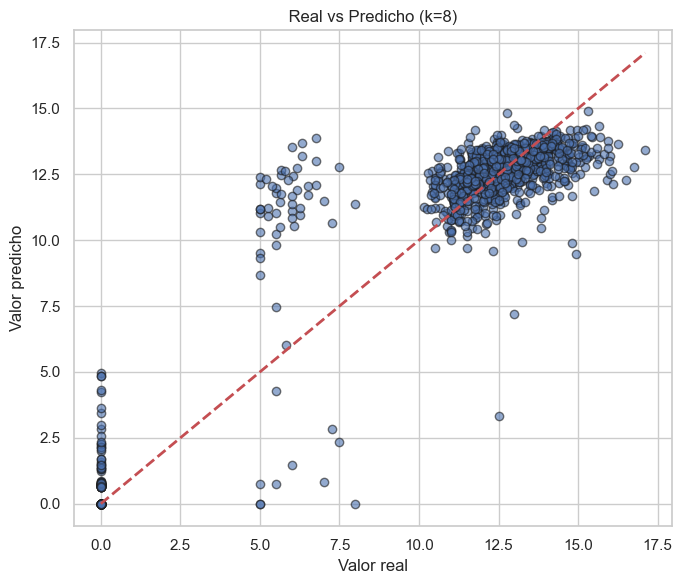

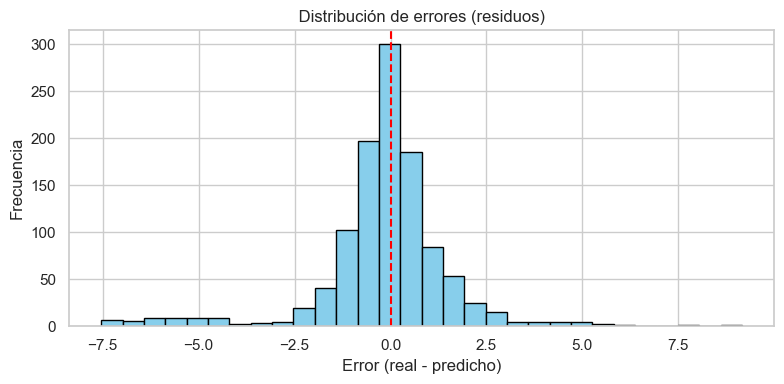

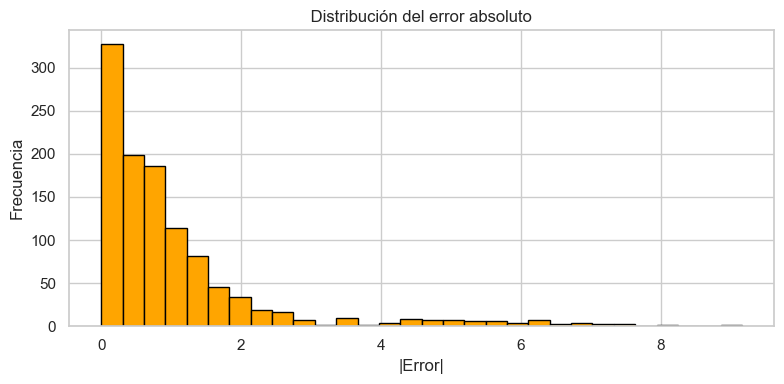

In [121]:

# 1) Gráfico Real vs Predicho (holdout)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title(f" Real vs Predicho (k={best_k}) ")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Distribución de errores (residuos) en holdout
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.axvline(0, linestyle='--', color='red', lw=1.5)
plt.title(" Distribución de errores (residuos) ")
plt.xlabel("Error (real - predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Distribución del error absoluto en holdout
abs_errors = np.abs(residuals)
plt.figure(figsize=(8, 4))
plt.hist(abs_errors, bins=30, edgecolor='black', color='orange')
plt.title(" Distribución del error absoluto ")
plt.xlabel("|Error|")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


¿Cómo interpretamos esto?

**1) Real vs. Predicho**  
La nube de puntos cae bastante cerca de la diagonal roja (que sería la predicción perfecta), así que el modelo está bien calibrado en general. En los valores muy bajos hay más dispersión: a veces el modelo predice un poco por encima de lo real (sobre-predice cerca de 0).

**2) Histograma de residuos (real − predicho)**  
La distribución se centra alrededor de 0, lo cual significa que **no hay un sesgo fuerte**: no vive sobre- ni sub-prediciendo de forma sistemática. Hay una cola hacia la derecha (algunos casos con real > predicho), o sea **sub-predicción** en pocos puntos, y aparecen algunos errores grandes pero muy pocos.

**3) Histograma del error absoluto |error|**  
La mayor parte de las observaciones tiene **errores pequeños** y una cola larga de pocos casos con errores altos. Esto cuadra con las métricas: **MAE ≈ 1.05** (error promedio bajo) y **RMSE > MAE** (unos pocos errores grandes elevan el RMSE).

**En resumen:** Las tres gráficas cuentan la misma historia: **buen ajuste general**, con algunos casos difíciles en los extremos.

## 3. Conclusiones

Aunque en lo personal pensamos que es un poco díficil comparar ambos modelos ya que no son del mismo tipo, ambos nos ofrecen soluciones distintas al mismo problema, ya que si bien el de clasificación es quien nos dice si un estudiante abandona o no, con el de regresión nos podemos dar una idea de esto gracias a la nota que logró dicho estudiante.

En el caso del modelo de clasificación el valor de `k` que mejor resultado dió fue de 3, considerando la métrica f1-score, mientras que en el de regresión fue de 8 considerando la métrica RMSE.

Por último, una reflexión que podemos obtener sobre el modelo K-nn al hacer este proyecto, es que, si bien una de sus ventajas es que es el más simple de entender, ya que se basa netamente en qué tan alejado estan los registros para predecir, sentimos que podría tener limitaciones en el mundo real, ya que por ejemplo, al basarse en distancias, siempre tenemos que estandarizar y codificar variables despues de cada split para evitar el data leakage, lo cual conlleva a un costo computacional alto.